#Overview

In this week's independent project, you will be working as a data scientist working for an electric car-sharing service company. You have been tasked to process stations data to understand electric car usage over time by solving for the following research question;

#Research Question

-Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

# 1-Data Cleaning Using Python

##1.0 Importing Libraries

In [2]:
# Importing the pandas and numpy library
import pandas as pd
import numpy as np

##1.1 Reading the Dataset from CSV file

You can get the data and the dataset description for this Independent project here http://bit.ly/autolib_dataset and https://drive.google.com/a/moringaschool.com/file/d/13DXF2CFWQLeYxxHFekng8HJnH_jtbfpN/view?usp=sharing respectively. The dataset contains data collected for a period of 9 days. The dataset may take a bit of some time to load [~ 10 minutes]. 

In [4]:
# Let's read the data from the CSV file and create the dataframe to be used
df = pd.read_csv('http://bit.ly/autolib_dataset')

##1.2 Previewing the Dataset

In [12]:
# Preview the first 10 rows of our data
df.head(100)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10 Rue du Ranelagh,1,1,0,0,0,nonexistent,Paris,NaN,paris-ranelagh-10,STATION,"48.8533737, 2.2794884",75016,Paris/Ranelagh/10,operational,NaN,5,station,ok,nonexistent,2018,4,7,6,55
96,10 rue Guy Patin,3,3,0,0,2,operational,Paris,NaN,paris-guypatin-10,STATION,"48.88363, 2.351257",75010,Paris/Guy Patin/10,operational,NaN,3,station,ok,nonexistent,2018,4,2,7,31
97,24 Avenue d'IÃ©na,0,0,0,0,0,nonexistent,Paris,NaN,paris-iena-24,STATION,"48.8653828, 2.2945784",75016,Paris/IÃ©na/24,operational,NaN,4,station,ok,nonexistent,2018,4,1,6,20
98,56 Rue La Fayette,3,3,0,0,0,operational,Paris,NaN,paris-lafayette-56,STATION,"48.875464, 2.342083",75009,Paris/La Fayette/56,operational,NaN,1,station,ok,nonexistent,2018,4,6,12,19


##1.3 Accessing Information about the Dataset

In [6]:
# Getting to know more about the dataset by accessing its information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

##1.4 Cleaning the Dataset



1.   Check for data Validity
2.   Check for data Accuracy
3.   Check for data Completeness
4.   Check for data Consistency
5.   Check for data Uniformity






In [42]:
# Dropping unnecesary columns
df1 = df.drop(columns=['Address','Cars','Displayed comment','Scheduled at','Subscription status','Geo point'])
df1.head()

,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,year,month,day,hour,minute
0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,2,station,ok,2018,4,8,11,43
1,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,2018,4,6,7,24
2,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,2018,4,3,20,14
3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,2018,4,4,4,37
4,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,ok,2018,4,8,17,23


In [43]:
# Dropping unnecesary raws
# Picking rows where Rental status is "operational": The other statuses i.e broken, future, 
# non-existent will not be used in this analysis
# The non-operational stations does not have resources
df2 = df1.loc[df1["Rental status"] == "operational"]
df2.shape

(4618, 19)

In [44]:
# Dropping unnecesary raws
# Picking rows where Status is "ok": the other statuses i.e closed, schedule will 
# not be used in this Analysis since they don't have resources
df3 = df2.loc[df2["Status"] == "ok"]
df3.shape

(4618, 19)

In [45]:
# Dropping unnecesary raws
# Picking rows where Station type is "station" or "full_station": the other station type i.e "subs_center" 
# will not be used in this Analysis ince they don't have resources
df4 = df3.loc[df3["Station type"] != "subs_center"]
df4.shape

(4618, 19)

In [46]:
# Dropping unnecesary raws
# Picking rows where kind is "station" or "space" or "parking": the other station type i.e "center" 
# will not be used in this Analysis since they don't have resources
df5 = df4.loc[df4["Kind"] != "CENTER"]
df5.shape

(4618, 19)

In [47]:
#Dropping additional unnecesary columns after dropping rows
df6 = df5.drop(columns=['Kind','Station type','Status','Rental status'])
df6.head()

,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Postal code,Public name,Slots,year,month,day,hour,minute
0,0,0,0,0,nonexistent,Paris,paris-suffren-2,75015,Paris/Suffren/2,2,2018,4,8,11,43
1,6,0,0,0,operational,Paris,paris-raymondlosserand-145,75014,Paris/Raymond Losserand/145,0,2018,4,6,7,24
2,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,93350,Le Bourget/John Fitzgerald Kennedy/2,1,2018,4,3,20,14
3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,75013,Paris/EugÃ¨ne OudinÃ©/51,2,2018,4,4,4,37
4,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,75017,Paris/Porte de Champerret/6,3,2018,4,8,17,23


In [48]:
#Checking for completeness
df6.isnull().count()

Bluecar counter       4618
Utilib counter        4618
Utilib 1.4 counter    4618
Charge Slots          4618
Charging Status       4618
City                  4618
ID                    4618
Postal code           4618
Public name           4618
Slots                 4618
year                  4618
month                 4618
day                   4618
hour                  4618
minute                4618
dtype: int64

In [49]:
# Making columns names uniform
df6.columns = df6.columns.str.strip().str.lower().str.replace(' ', '_')
df6.head()

,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,postal_code,public_name,slots,year,month,day,hour,minute
0,0,0,0,0,nonexistent,Paris,paris-suffren-2,75015,Paris/Suffren/2,2,2018,4,8,11,43
1,6,0,0,0,operational,Paris,paris-raymondlosserand-145,75014,Paris/Raymond Losserand/145,0,2018,4,6,7,24
2,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,93350,Le Bourget/John Fitzgerald Kennedy/2,1,2018,4,3,20,14
3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,75013,Paris/EugÃ¨ne OudinÃ©/51,2,2018,4,4,4,37
4,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,75017,Paris/Porte de Champerret/6,3,2018,4,8,17,23


Text(0, 0.5, 'Number of Bluecar')

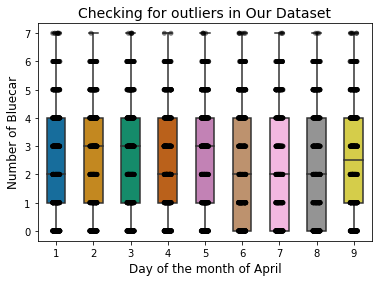

In [73]:
# Checking for outlliers in our primary column, bluecar_counter
import seaborn as sns
bplot = sns.boxplot(y='bluecar_counter', x='day', data=df6, width=0.5, palette="colorblind")
bplot =sns.stripplot(y='bluecar_counter', x='day',  data=df6, jitter=True, marker='o', alpha=0.5, color='black')
bplot.axes.set_title("Checking for outliers in Our Dataset", fontsize=14)
bplot.set_xlabel("Day of the month of April", fontsize=12)
bplot.set_ylabel("Number of Bluecar", fontsize=12)

#2-Exporting the Cleaned Dataset

In [50]:
#Exporting the dataset to a csv file for analysis in SQL
df6.to_csv('autolib_dataset.csv')

#3-Data Analysis using SQL

##3.0 Connecting to Database

In [51]:
# loading the sql extension into our environment
%load_ext sql

# Then connect to our in memory sqlite database
# NB: This database will cease to exist as soon as the database connection is closed. 
%sql sqlite://

'Connected: @None'

##3.1 Importing Data from CSV files

In [53]:
# Loading our table from the respective CSV files
# We will export the dataset that we have cleaned using python
#
with open('autolib_dataset.csv','r') as f:
    dataset = pd.read_csv(f, index_col=0, encoding='utf-8')
%sql DROP TABLE if EXISTS dataset;
%sql PERSIST dataset;

 * sqlite://
Done.
 * sqlite://


'Persisted dataset'

## 3.2 Previewing the Dataset

In [55]:
# Let's preview the first 5 rows of our data
# 
%%sql
SELECT*FROM DATASET LIMIT 5

 * sqlite://
Done.


index,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,postal_code,public_name,slots,year,month,day,hour,minute
0,0,0,0,0,nonexistent,Paris,paris-suffren-2,75015,Paris/Suffren/2,2,2018,4,8,11,43
1,6,0,0,0,operational,Paris,paris-raymondlosserand-145,75014,Paris/Raymond Losserand/145,0,2018,4,6,7,24
2,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,93350,Le Bourget/John Fitzgerald Kennedy/2,1,2018,4,3,20,14
3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,75013,Paris/EugÃ¨ne OudinÃ©/51,2,2018,4,4,4,37
4,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,75017,Paris/Porte de Champerret/6,3,2018,4,8,17,23


## 3.3 Accessing Information about the Dataset

In [56]:
# Getting to know more about the dataset by accessing its information
%%sql
PRAGMA table_info(DATASET);

 * sqlite://
Done.


cid,name,type,notnull,dflt_value,pk
0,index,BIGINT,0,None,0
1,bluecar_counter,BIGINT,0,None,0
2,utilib_counter,BIGINT,0,None,0
3,utilib_1.4_counter,BIGINT,0,None,0
4,charge_slots,BIGINT,0,None,0
5,charging_status,TEXT,0,None,0
6,city,TEXT,0,None,0
7,id,TEXT,0,None,0
8,postal_code,BIGINT,0,None,0
9,public_name,TEXT,0,None,0


## 3.4 Analysis

Research Question

Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

In [59]:
# To identify the popular hour when the Bluecar was picked most, we are going to get the same of the Bluecar 
# at the stations per hour for the Month of April
%%sql
SELECT SUM(BLUECAR_COUNTER),HOUR FROM DATASET
WHERE CITY == 'Paris'
GROUP BY HOUR

 * sqlite://
Done.


SUM(BLUECAR_COUNTER),hour
206,0
207,1
221,2
242,3
209,4
235,5
260,6
225,7
234,8
250,9


#Conclusion

From the analysis above, the number of Bluecar present at the stations (in Paris) per hour, from o hour to 23 hour is shown. The hour with the maximum number of cars in the stations is hour 21 (268 cars) and the minimum number of cars in the stations was experienced at hour 20 (149 cars). 

Therefore, we can conclude that the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018 is HOUR 20